# Equipo 2

##Proyecto Integrador- Avance 3

# ***Alumnos:***

## David Moisés Alfandari Martínez - A01794577

## Fernando García Corona          - A01793717

## Jesús Elías Ruiz Montoya         - A01794485

------------------------------------------------------
# Avance 1. Análisis exploratorio de datos
------------------------------------------------------
Análisis exploratorio de datos.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Montar Google Drive para cargar los datos.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importar librerías necesarias.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

In [ ]:
# Cargar el archivo CSV.
df = pd.read_csv('/content/drive/MyDrive/Proyecto Integrador/NewVehicleFillData.csv')

### Información general del DataFrame

In [ ]:
df.head()

,Machine,Timestamp,VIN,ROT,Machine ID,Cycle Result,Failed on Field,Actual Style Cycled,EPS Style Selected,Machine Cycle Status,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,Ch2 Rad Fill Online Backup,06/07/2024 04:14,NaN,0,615,FAIL,NaN,4,4,MANUAL ABORT/STOP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ch2 Rad Fill Online Backup,06/07/2024 04:15,NaN,0,615,FAIL,NaN,4,4,MANUAL ABORT/STOP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ch2 Rad Fill Online Backup,08/07/2024 07:22,1FMJU1L80REA66706,2515,615,PASS,NaN,1,1,CYCLE ACCEPT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ch2 Rad Fill Online Backup,08/07/2024 07:41,NaN,0,615,FAIL,NaN,5,5,MANUAL ABORT/STOP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ch2 Rad Fill Online Backup,08/07/2024 07:41,NaN,0,615,FAIL,NaN,5,5,MANUAL ABORT/STOP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Exploración general del DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74201 entries, 0 to 74200
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Machine                 74201 non-null  object 
 1   Timestamp               74201 non-null  object 
 2   VIN                     73685 non-null  object 
 3   ROT                     74201 non-null  int64  
 4   Machine ID              74201 non-null  int64  
 5   Cycle Result            74201 non-null  object 
 6   Failed on Field         38678 non-null  object 
 7   Actual Style Cycled     74201 non-null  object 
 8   EPS Style Selected      74201 non-null  object 
 9   Machine Cycle Status    74201 non-null  object 
 10  Adapter #               74201 non-null  int64  
 11  Cycle Time              74201 non-null  float64
 12  Vacuum                  74201 non-null  int64  
 13  Pressure                74201 non-null  float64
 14  Volume                  74201 non-null

### Limpieza del dataset

In [ ]:
# Eliminamos las columnas 1,2, 4, 5,19 a la 30 ya que no agregan valores útiles al análisis
df.drop(df.columns[17:30], axis=1, inplace=True)
df.drop(df.columns[[0,1,2,3,4]], axis=1, inplace=True)
df.head()

,Cycle Result,Failed on Field,Actual Style Cycled,EPS Style Selected,Machine Cycle Status,Adapter #,Cycle Time,Vacuum,Pressure,Volume,Pressure Decay,Flowback Volume
0,FAIL,NaN,4,4,MANUAL ABORT/STOP,0,4.63,209,0.0,0.00,0.0,0.0
1,FAIL,NaN,4,4,MANUAL ABORT/STOP,0,25.05,209,0.0,0.00,0.0,0.0
2,PASS,NaN,1,1,CYCLE ACCEPT,0,73.34,5,20.4,16.92,0.5,3.0
3,FAIL,NaN,5,5,MANUAL ABORT/STOP,0,2.76,209,0.0,0.00,0.0,0.0
4,FAIL,NaN,5,5,MANUAL ABORT/STOP,0,6.81,209,0.0,0.00,0.0,0.0


Se identifica la columna Failed on Field como la variable objetivo del dataset, porque ahí se indican las unidades que han fallado en campo y que pasaron el proceso de planta. Se hace el reemplazo de NaN por No, para indicar que esas "no fallaron en campo", las que fallaron ya cuentan con la etiqueta "YES". Posteriormente de hace la binarizacion.

In [ ]:
# Convertimos a int (1 | 0) los valores de las variables Failed on Field y Cycle Result
df['Failed on Field'].replace(np.nan, 'No', inplace=True)
df['Failed on Field'] = df['Failed on Field'].apply(lambda x: 1 if x == 'Yes' else 0)

df['Cycle Result'] = df['Cycle Result'].apply(lambda x: 1 if x == 'PASS' else 0)

In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

In [ ]:
df.isnull().sum()

,0
Cycle Result,0
Failed on Field,0
Actual Style Cycled,0
EPS Style Selected,0
Machine Cycle Status,0
Adapter #,0
Cycle Time,0
Vacuum,0
Pressure,0
Volume,0


In [ ]:
### ¿Cuáles son las estadísticas resumidas del conjunto de datos?

Se establecen las estadísitcas de las columnas numéricas de todas las variables del dataframe.

In [ ]:
# Estadísticas resumidas del conjunto de datos numéricos mediante la transpuesta para una facilitar la lectura.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cycle Result,74201.0,0.963882,0.186585,0.0,1.00,1.00,1.00,1.00
Failed on Field,74201.0,0.004919,0.069964,0.0,0.00,0.00,0.00,1.00
Adapter #,74201.0,0.962372,0.194151,0.0,1.00,1.00,1.00,8.00
Cycle Time,74201.0,79.495457,11.338630,0.0,74.69,80.51,85.92,177.54
Vacuum,74201.0,15.083638,33.493399,0.0,10.00,12.00,14.00,954.00
Pressure,74201.0,23.771724,4.435234,0.0,22.70,24.30,25.60,29.90
Volume,74201.0,26.038605,7.264479,0.0,22.25,25.24,32.38,38.37
Pressure Decay,74201.0,0.976104,0.561037,-1.1,0.70,0.90,1.20,15.00
Flowback Volume,74201.0,2.723595,2.939119,-100.0,2.20,2.40,2.80,100.00


Se establecen las descripción de las columnas de todas las variables categóricas del dataframe.

In [ ]:
df.describe(include = 'object').T

,count,unique,top,freq
Actual Style Cycled,74201,16,1,13583
EPS Style Selected,74201,12,1,13691
Machine Cycle Status,74201,20,CYCLE ACCEPT,71405


In [ ]:
# Agregar cuenta de valores válidos para cada columna.
valid_counts = df.count()
print("Valid counts:")
print(valid_counts)

Valid counts:
Cycle Result            74201
Failed on Field         74201
Actual Style Cycled     74201
EPS Style Selected      74201
Machine Cycle Status    74201
Adapter #               74201
Cycle Time              74201
Vacuum                  74201
Pressure                74201
Volume                  74201
Pressure Decay          74201
Flowback Volume         74201
dtype: int64


In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

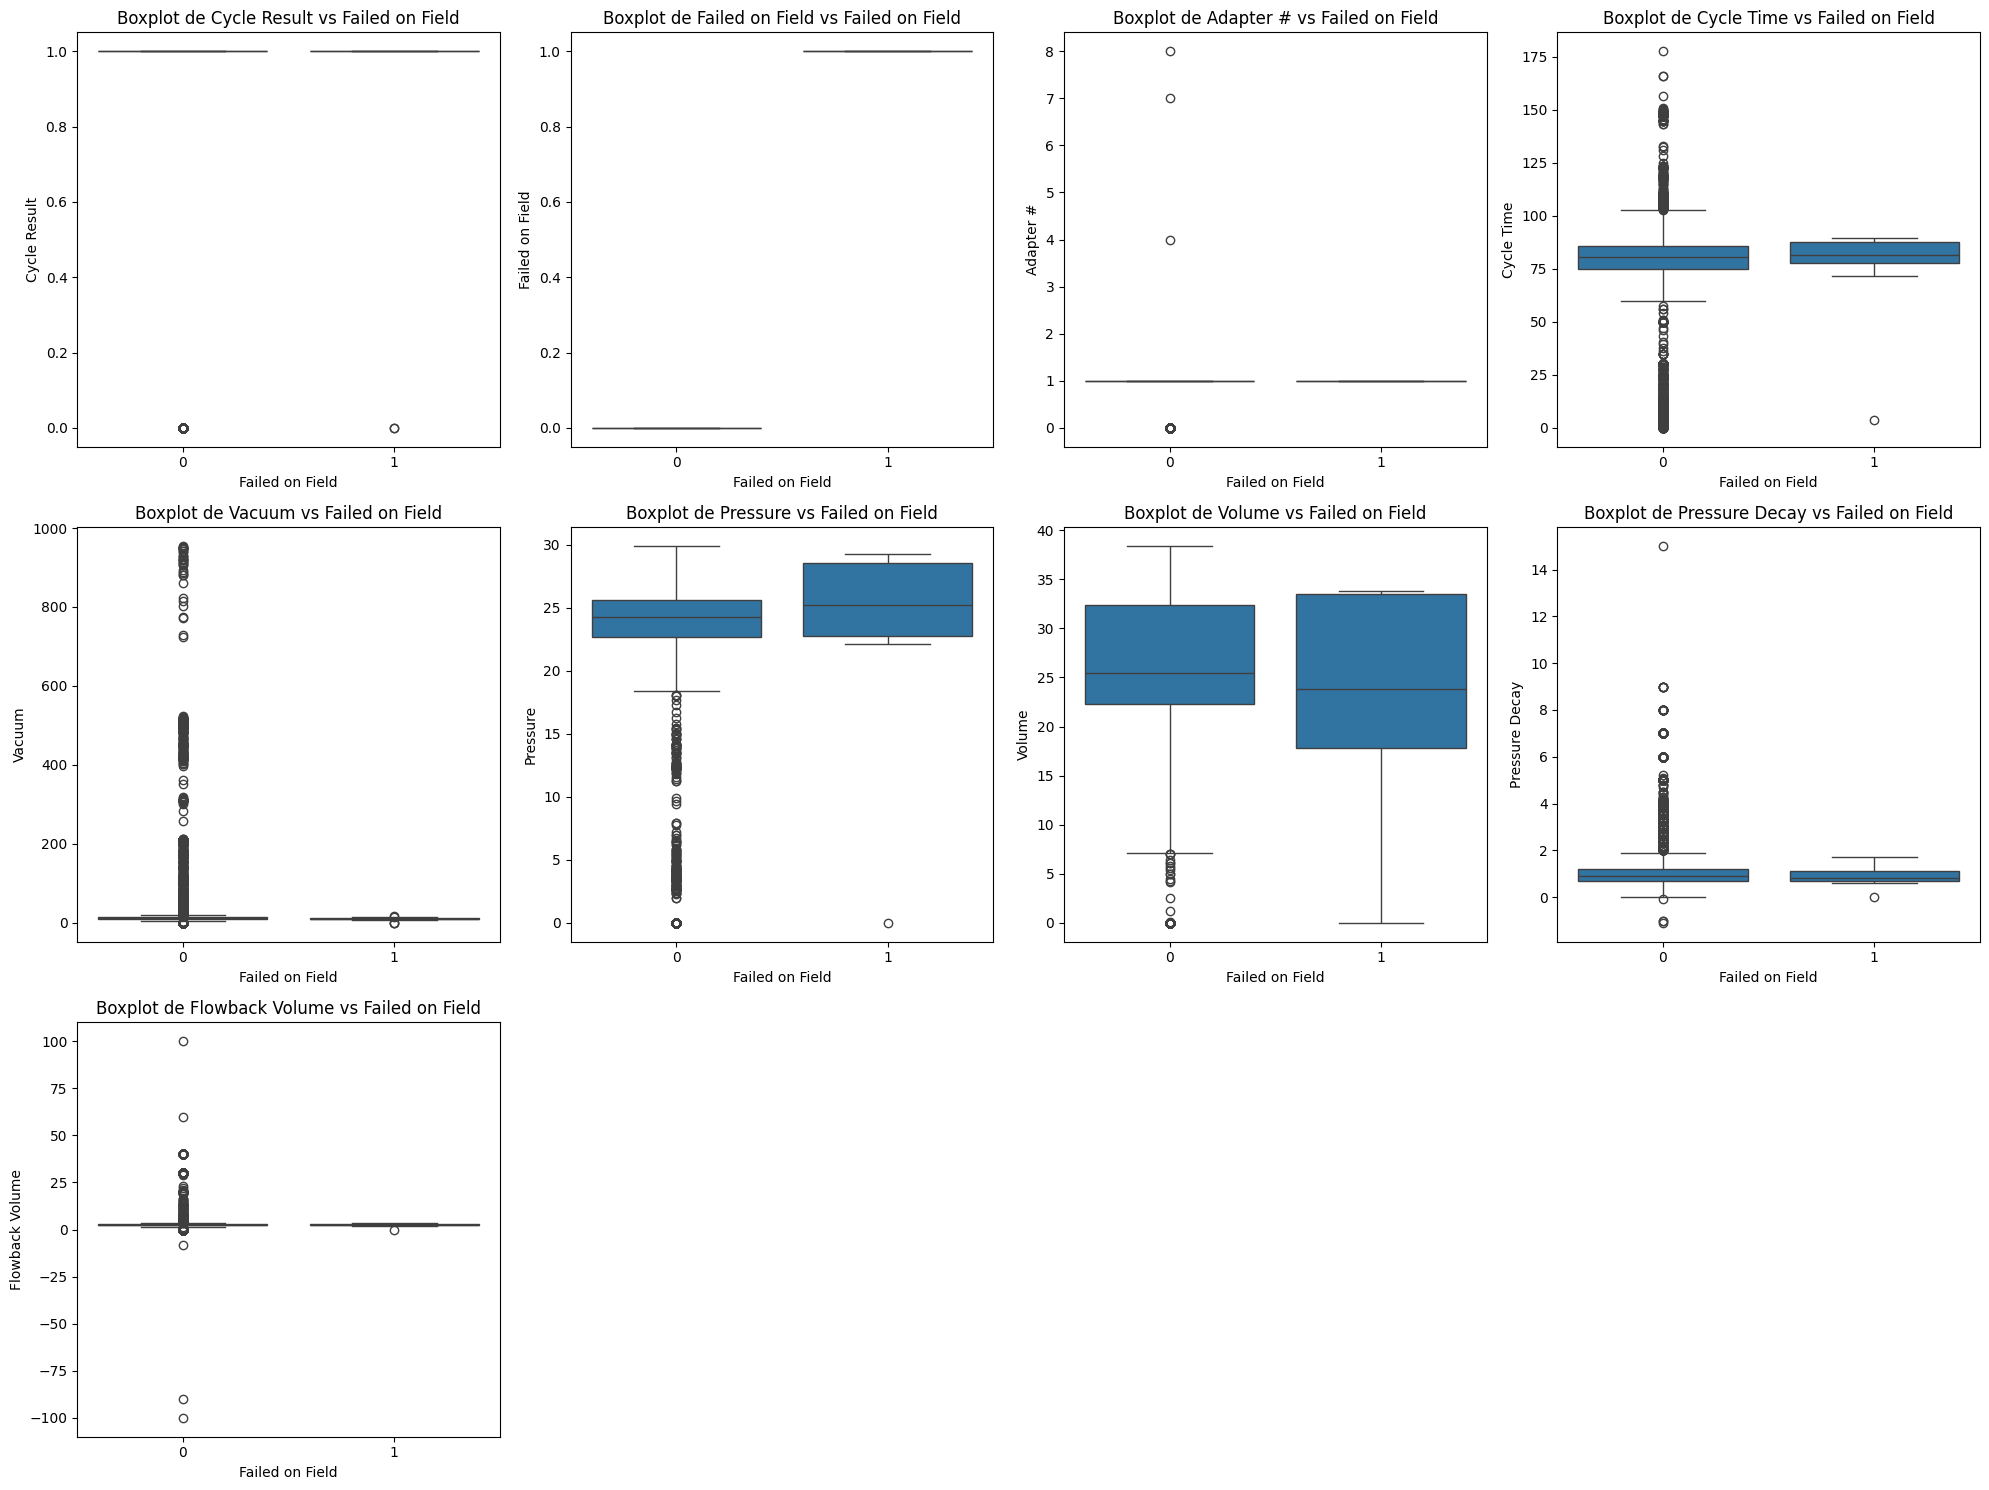

In [ ]:
import math

# Variables numéricas.
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Configurar la cuadrícula.
n_cols = 4  # Número de columnas.
n_rows = math.ceil(len(numerical_columns) / n_cols)  # Número de filas basado en el total de variables.
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))  # Ajustar el tamaño de la figura.

# Aplanar los ejes (en caso de que haya más de una fila/columna).
axes = axes.flatten()

# Crear los boxplots en cada posición de la cuadrícula.
for i, col in enumerate(numerical_columns):
    sns.boxplot(x='Failed on Field', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot de {col} vs Failed on Field')

# Eliminar gráficos en blanco (si hay menos variables que subplots disponibles).
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Ajustar los espacios entre los subplots.
plt.show()

### ¿Hay valores atípicos en el conjunto de datos?

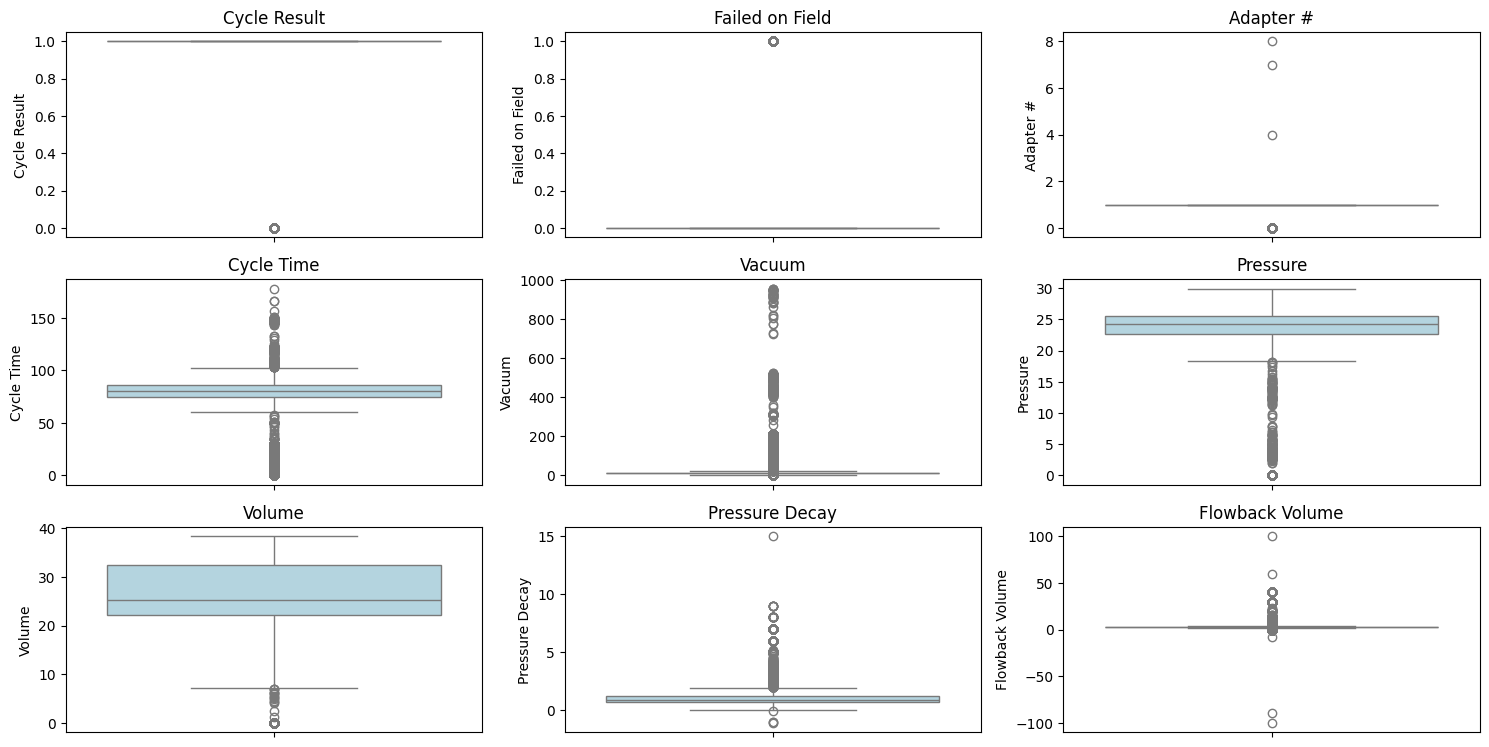

In [ ]:
# Boxplots para detectar valores atípicos.

plt.figure(figsize=(15, 10))

rows = (len(numerical_cols) // 3) + 1  # Aseguramos que hay suficientes posiciones para los subplots.
for i, col in enumerate(numerical_cols, 1): # Iterar solo sobre las columnas válidas.
    plt.subplot(rows, 3, i) # Posicionar los subplots correctamente.
    sns.boxplot(data=df[col], color='lightblue')
    plt.title(f'{col}', fontsize=12)

plt.tight_layout()
plt.show()

### ¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?

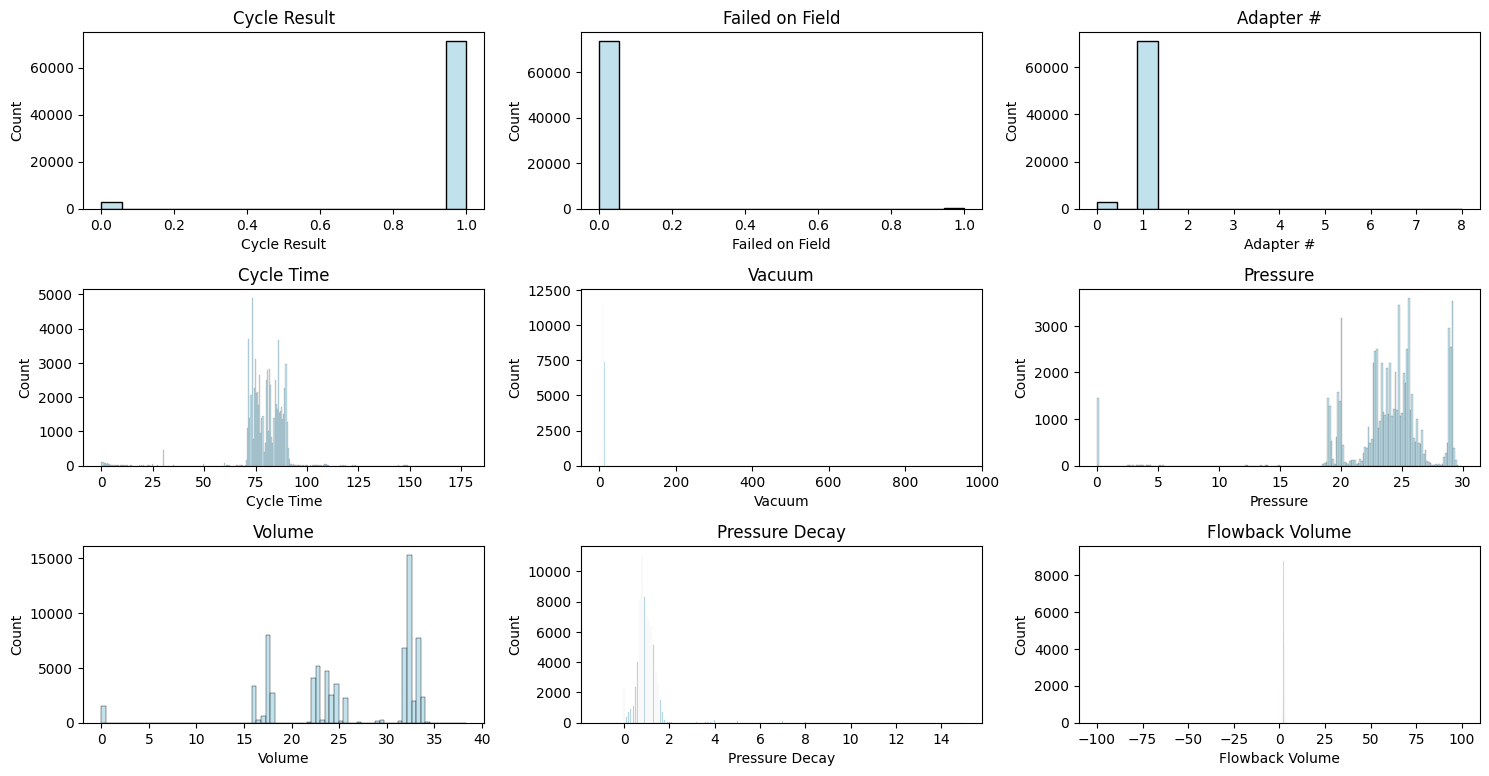

In [ ]:
# Histogramas para revisar las distribuciones.
plt.figure(figsize=(15, 10))

rows = (len(numerical_cols) // 3) + 1
for i, col in enumerate(df[numerical_cols], 1):
    plt.subplot(rows, 3, i)
    sns.histplot(df[col], color='lightblue')
    plt.title(f'{col}', fontsize=12)

plt.tight_layout()
plt.show()

### ¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia?

In [ ]:
df[numerical_cols].isnull().sum()

,0
Cycle Result,0
Failed on Field,0
Adapter #,0
Cycle Time,0
Vacuum,0
Pressure,0
Volume,0
Pressure Decay,0
Flowback Volume,0


### ¿Hay correlación entre las variables dependientes e independientes?

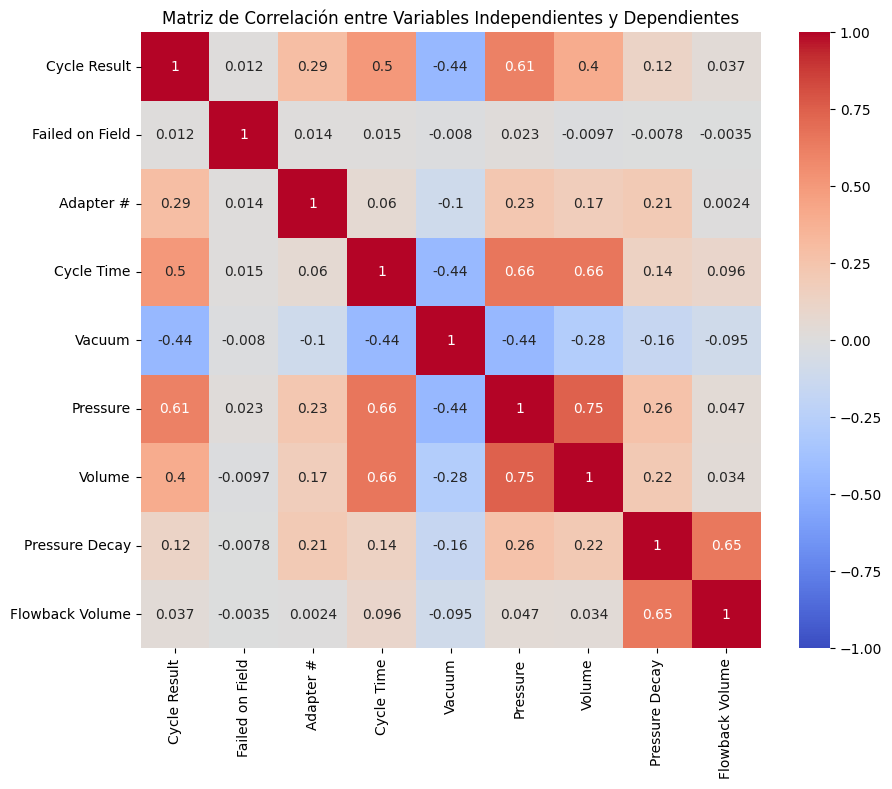

In [ ]:
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación entre Variables Independientes y Dependientes')
plt.show()

### ¿Cómo se distribuyen los datos en función de diferentes categorías?

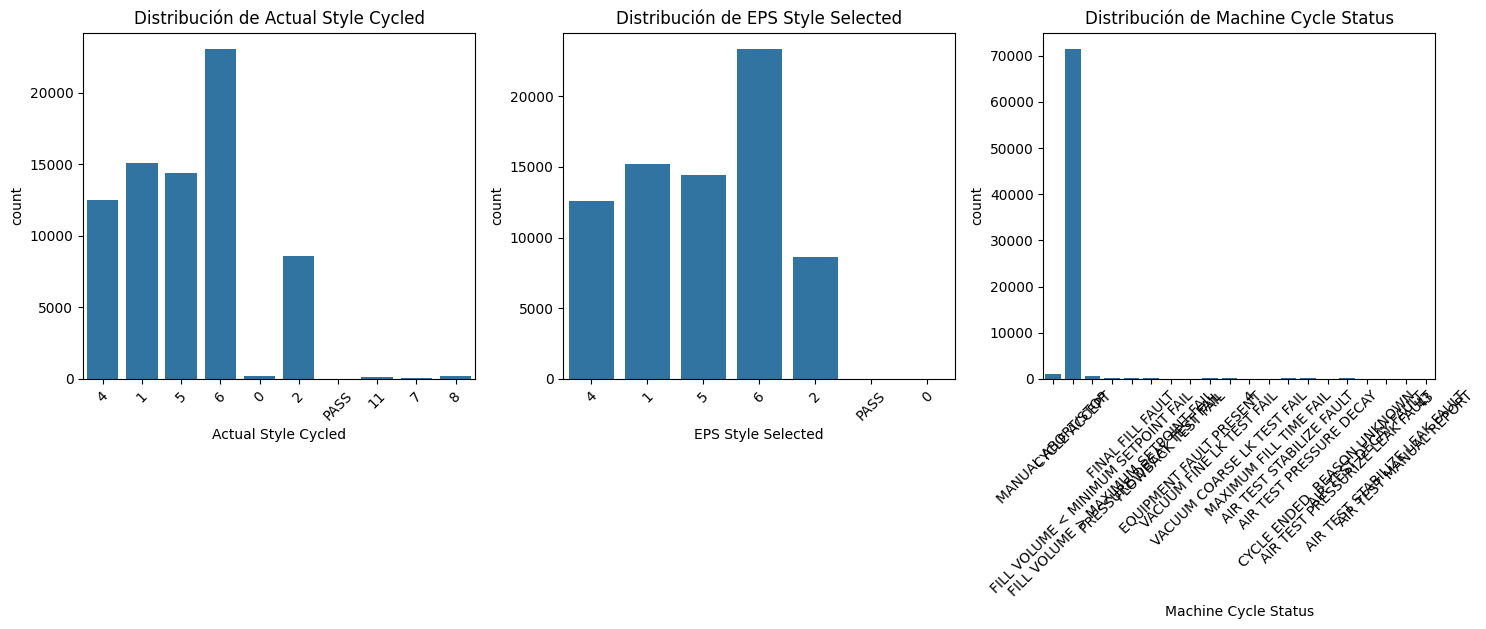

In [ ]:
# Visualización de la distribución de datos en función de diferentes categorías.
plt.figure(figsize=(15, 10))
rows = (len(categorical_cols) // 3) + 1

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(rows, 3, i)
    sns.countplot(x=df[col], data=df)
    plt.title(f'Distribución de {col}', fontsize=12)
    plt.xticks(rotation=45)  # Rotación de los nombres de las categorías.

plt.tight_layout()
plt.show()

### ¿Existen patrones o agrupaciones (clusters) en los datos con características similares?

Cycle Result       0
Failed on Field    0
Adapter #          0
Cycle Time         0
Vacuum             0
Pressure           0
Volume             0
Pressure Decay     0
Flowback Volume    0
dtype: int64


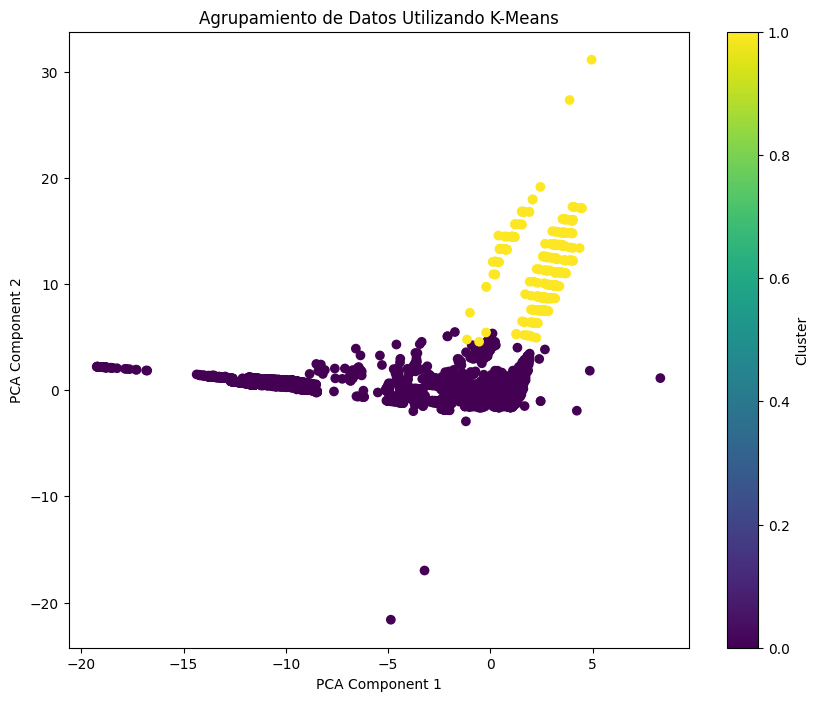

In [ ]:
# Verificamos si hay valores nulos en las columnas seleccionadas.
print(df[numerical_cols].isnull().sum())

# Imputación o eliminación de valores nulos (aquí se eliminamos las filas con NaN).
df_clean = df[numerical_cols].dropna()

# Estandarización de los datos.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

# Realizamos los agrupamientos por medio de: K-means clustering.
kmeans = KMeans(n_clusters=2, random_state=42)
df_clean['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualizamos los clusters utilizando PCA para reducir la dimensionalidad a 2D.
pca = PCA(n_components=0.90)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 8))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df_clean['Cluster'], cmap='viridis')
plt.title('Agrupamiento de Datos Utilizando K-Means')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
# Selección únicamente de las columnas numéricas.
df_cluster = df.select_dtypes(include=[np.number])

# Escalamiento los datos numéricos.
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cluster), columns=df_cluster.columns)

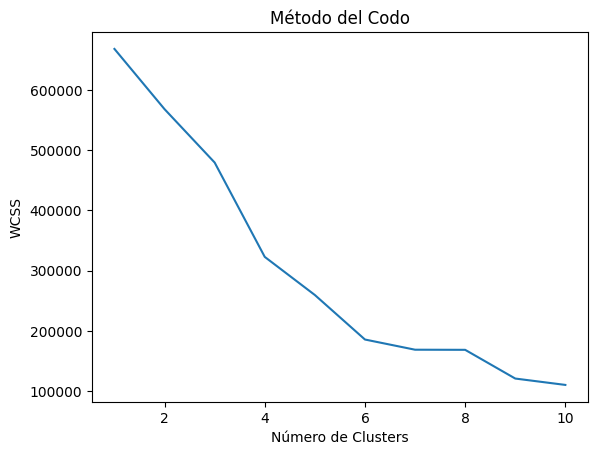

In [ ]:
# Gráfico del método del codo para determinar el número de clusters
wcss = []
for i in range(1, 11):
   kmeans = KMeans(n_clusters=i, random_state=42)
   kmeans.fit(df_scaled)
   wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Aplicar K-means con 2 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)
df['KMeans_Labels'] = kmeans.predict(df_scaled)

In [ ]:
# Comparación de clusters con 'Failed on Field'
print(pd.crosstab(df['KMeans_Labels'], df['Failed on Field']))

Failed on Field      0    1
KMeans_Labels              
0                40378  134
1                  727    0
2                32731  231


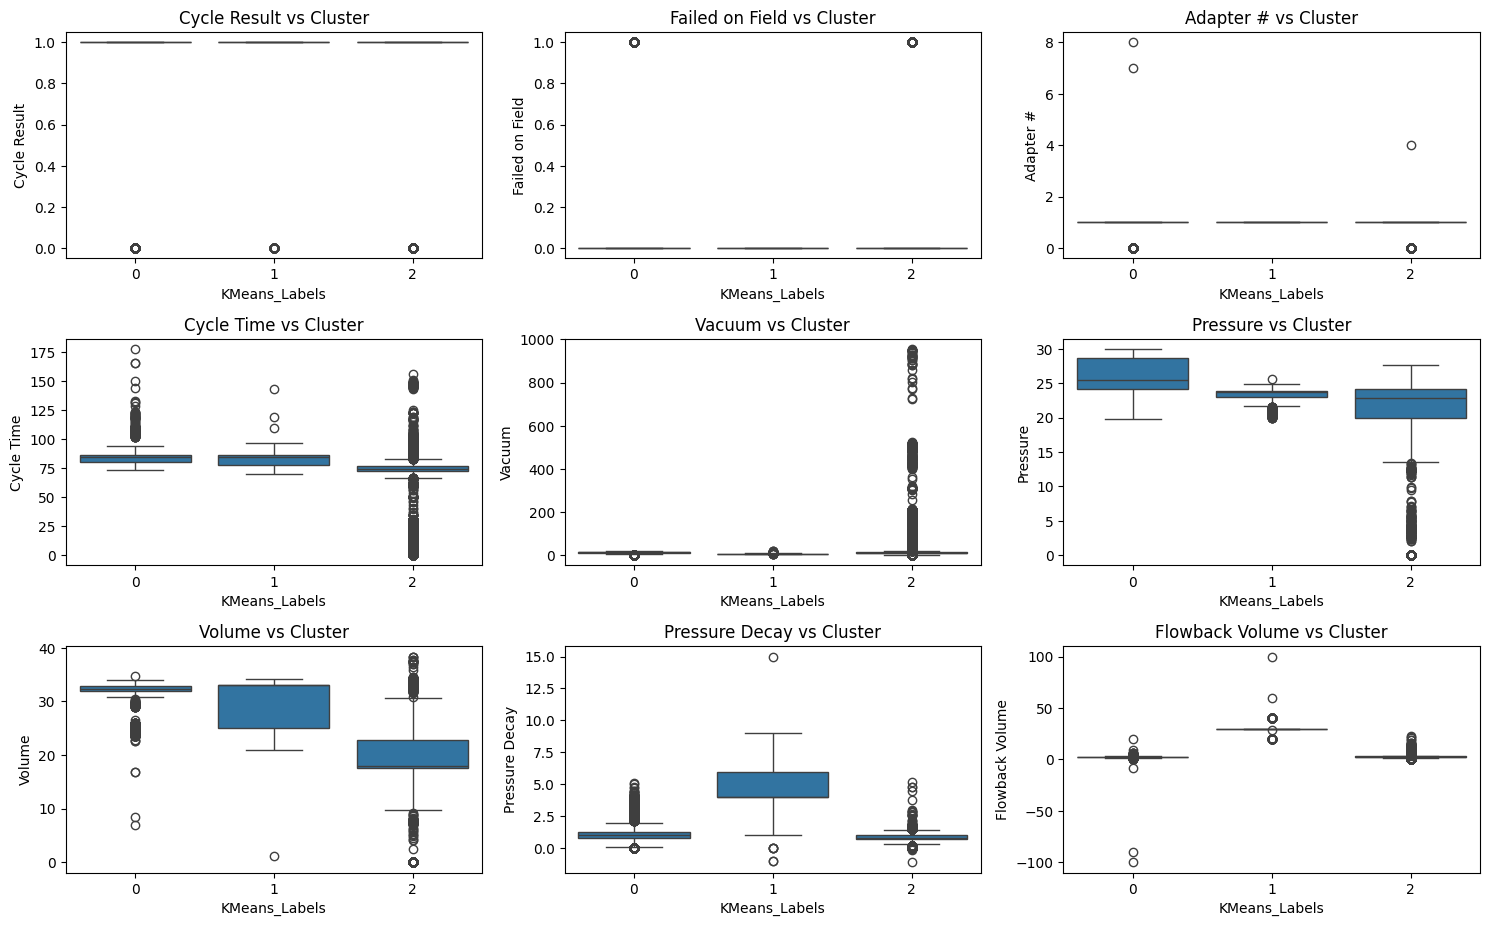

In [ ]:
# Graficar distribución de variables numéricas por cluster
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
   plt.subplot(len(numerical_cols) // 3 + 1, 3, i)
   sns.boxplot(x='KMeans_Labels', y=col, data=df)
   plt.title(f'{col} vs Cluster')
plt.tight_layout()
plt.show()

In [ ]:
# Crear tabla de contingencia entre la variable de salida y las variables categóricas.
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df['Failed on Field'])
    print(f'Tabla de contingencia para {col} vs Failed on Field')
    print(contingency_table)
    print('\n')

Tabla de contingencia para Actual Style Cycled vs Failed on Field
Failed on Field          0    1
Actual Style Cycled            
0                      212    0
1                    13449  134
2                     3897   35
4                     5512   38
5                     7578   63
6                    10002   95
7                       63    0
8                      205    0
11                     150    0
0                       13    0
1                     1508    0
2                     4630    0
4                     6965    0
5                     6719    0
6                    12932    0
PASS                     1    0


Tabla de contingencia para EPS Style Selected vs Failed on Field
Failed on Field         0    1
EPS Style Selected            
0                       7    0
1                   13557  134
2                    3960   35
4                    5583   38
5                    7660   64
6                   10301   94
1                    1516    0
2           

# Conclusiones
## Calidad y estructura de los datos
Es importante verificar si existen valores nulos en las variables numéricas del conjunto de datos que puedan impactar el análisis de exploración inicial y que posteriormente, podría impedir el proceso de agrupamiento o 'clustering'. Con el objetivo de mantener la fluidez y la integridad del análisis incluso con bases de datos postriores, fue necesario imputar dichos valores nulos o eliminar las filas correspondientes.
Por otro lado, se realizó un análisis de las estadísticas descriptivas para obtener una visión general de las distribuciones y rangos de las variables. A partir de la observación de los gráficos identificamos la necesidad de transformaciones adicionales en un tratamiento posterior.

## Valores atípicos y distribuciones
Por medio de diagramas de caja o 'boxplots', identificamos la existencia de valores atípicos en algunas variables importantes como en el tiempo del ciclo de evacuación/llenado y el volumen de llenado. La existencia de estos valores a los extremos pueden estar teniendo injerencia en el proceso general y pueden estar influyendo en las incidencias de fallos observados. Consideramos importante compartir estas observaciones con el especialista para ponderar el potencial impacto de estas desviaciones en las distribuciones.

## Correlaciones
Por medio de la matriz de correlación entre variables independientes y dependientes observamos algunas relaciones de moderada preponderancia entre algunas variables como la presión y el tiempo del ciclo de llenado, a partir de las cuales podemos sugerir el uso de modelos supervizados para predecir las magnitudes adecuadas en variables de interés.

## Patrones de datos a partir del Clustering o agrupamiento
Se aplicó el algoritmo 'K-means' para la agrupación de muestras en función de la similitud entre sus características, y el análisis visual por medio de PCA indica que los datos pueden identificarse dentro de tres 'clusters' o grupos principales. Esto sugiere  diferentes grupos de máquinas o comportamientos durante los procesos de llenado. Los patrones pueden ser útiles para una posterior segmentación entre grupos de operación en las máquinas.

## Comentarios sobre el análisis posterior
La agrupación de datos con K-Means y su comparación contra la variable referencia 'Failed on Field' nos permitió identificar patrones dentro de los datos. El análisis PCA identifica ciertas características que pueden ser fundamentales para poder predecir los fallos en campo. Los gráficos de barras y boxplots nos dan una visión más clara de la distribución que tienen las variables categóricas y su relación con el objetivo. El análisis bivariado de variables numéricas (por ejemplo: 'Pressure' vs 'Failed on Field') exhibió diferencias significativas, lo cual puede ser un indicativo de problemas en el proceso de llenado de refrigerante. Revisaremos este punto interesante con el especialista.

------------------------------------------------------
# Avance 2. Ingeniería de características
------------------------------------------------------

In [ ]:
# Importación de las librerías adicionales para la ingeniería de características, manejo de las variables categóricas y selección.
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

In [ ]:
# Generación de nuevas características; por ejemplo, creamos una interacción entre 'Vacuum' y 'Pressure'.
# Esta interacción nos ayudará a aprender relaciones no lineales en el modelo.
df_clean['Vacuum_Pressure_Interaction'] = df_clean['Vacuum'] * df_clean['Pressure']

A partir de esta nueva relación y características, exploramos la relación que guarda con parámetros críticos del proceso y de sus datos. Como ejemplo, interpolamos con volúmen, con el ciclo de tiempo de Evac and Fill y finalmente con Flowback Volume. La intención es mostrar estas relaciones al especialista y definir si existe algún interés en las relaciones o si se debe expandir o enfocar a algo más.

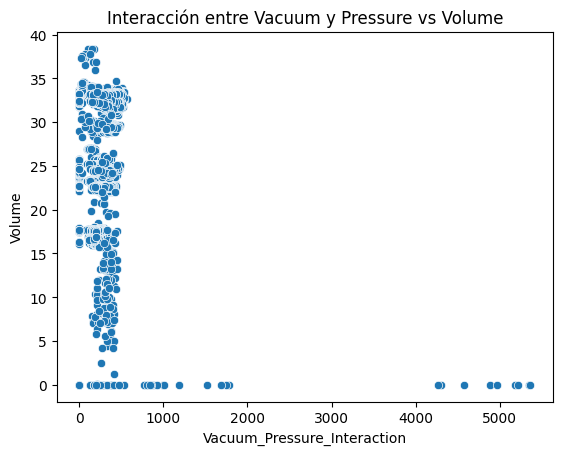

In [ ]:
# Gráfico de dispersión de la nueva columna vs la variable volume
sns.scatterplot(x='Vacuum_Pressure_Interaction', y='Volume', data=df_clean)
plt.title('Interacción entre Vacuum y Pressure vs Volume')
plt.show()

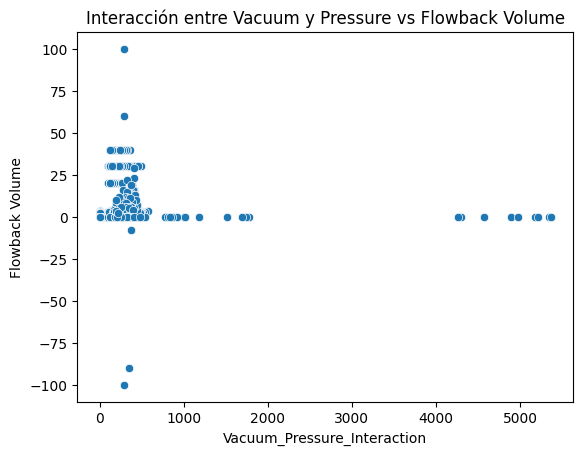

In [ ]:
# Gráfico de dispersión de la nueva columna vs la variable Flowback Volume
sns.scatterplot(x='Vacuum_Pressure_Interaction', y='Flowback Volume', data=df_clean)
plt.title('Interacción entre Vacuum y Pressure vs Flowback Volume')
plt.show()

### Codificación 'One-Hot'

Codificación 'One-Hot' para convertir las variables categóricas en un formato utilizable por los modelos de aprendizaje automático que requieren variables numéricas. Mediante la opción drop='first' se evita la multicolinealidad removiendo una de las categorías.
*Este paso parece redundante, pero se tuvo que realizar para poder ejecutar los pasos siguientes.*

In [ ]:
# Codificación One-Hot para las variables categóricas. Conversión de las variables categóricas en variables 'dummies' para su interpretación en los modelos de ML.
df[categorical_cols] = df[categorical_cols].astype(str)
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical = encoder.fit_transform(df[categorical_cols])

In [ ]:
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))

In [ ]:
df_clean = pd.concat([df_clean, encoded_categorical_df], axis=1)

Verificación de la existencia de las columnas categóricas originales, antes de cualquier eliminación que implique errores.

In [ ]:
# Verificación si las columnas categóricas están presentes antes de eliminarlas para prevenir errores al eliminar elementos que no existen en el DataFrame.
columns_to_drop = [col for col in categorical_cols if col in df_clean.columns]
columns_to_drop

[]

In [ ]:
# Actualiza la lista de columnas numéricas
numerical_cols = [col for col in numerical_cols if col in df_clean.columns]
print("Columnas numéricas actualizadas:", numerical_cols)

Columnas numéricas actualizadas: ['Cycle Result', 'Failed on Field', 'Adapter #', 'Cycle Time', 'Vacuum', 'Pressure', 'Volume', 'Pressure Decay', 'Flowback Volume']


In [ ]:
# Escalamiento o Estandarización de las características numéricas
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clean[numerical_cols + ['Vacuum_Pressure_Interaction']])

In [ ]:
scaled_df = pd.DataFrame(scaled_features, columns=numerical_cols + ['Vacuum_Pressure_Interaction'])
scaled_df.head().T

,0,1,2,3,4
Cycle Result,-5.165940,-5.165940,0.193576,-5.165940,-5.165940
Failed on Field,-0.070309,-0.070309,-0.070309,-0.070309,-0.070309
Adapter #,-4.956855,-4.956855,-4.956855,-4.956855,-4.956855
Cycle Time,-6.602734,-4.801799,-0.542878,-6.767658,-6.410470
Vacuum,5.789728,5.789728,-0.301065,5.789728,5.789728
Pressure,-5.359781,-5.359781,-0.760218,-5.359781,-5.359781
Volume,-3.584397,-3.584397,-1.255240,-3.584397,-3.584397
Pressure Decay,-1.739834,-1.739834,-0.848620,-1.739834,-1.739834
Flowback Volume,-0.926677,-0.926677,0.094044,-0.926677,-0.926677
Vacuum_Pressure_Interaction,-2.865148,-2.865148,-1.866345,-2.865148,-2.865148


### Normalización de las características
Este paso es importante para que las variables numéricas tengan una media de 0 y desviación estándar de 1; con lo cual se busca que todas las características tengan una preponderancia equivalente en el análisis. Se evitan las despropociones porque todas estarán a la misma escala.

Aplicación de transformación logarítmica y Box-Cox para características numéricas sesgadas mejorando así la estabilidad y el rendimiento del modelo.

In [ ]:
# Verificar los valores en la columna 'Volume'
print(df_clean['Volume'].describe())

# Aseguramiento de que todos los valores sean estrictamente positivos mediante la adición de una constante.
if (df_clean['Volume'] <= 0).any():
    df_clean['Volume'] = df_clean['Volume'] + abs(df_clean['Volume'].min()) + 1

# Aplicación de la transformación Box-Cox
pt = PowerTransformer(method='box-cox')
df_clean['Transformed_Volume'] = pt.fit_transform(df_clean[['Volume']])

count    74201.000000
mean        26.038605
std          7.264479
min          0.000000
25%         22.250000
50%         25.240000
75%         32.380000
max         38.370000
Name: Volume, dtype: float64


##Conclusiones del avance 2##

La ingeniería y selección de características nos ha permitido transformar el conjunto de datos original en una versión más estructurada que favorezca el análisis. La creación de nuevas variables a partir de interacciones (como 'Vacuum' con 'Pressure'), nos permite conocer relaciones que en primera instancia no son evidentes con las variables originales; aumentando así, la capacidad de predicción del modelo con mayor precisión. Se seleccionó esta combinación debido a la relevancia que tienen estos dos parámetros en el proceso, así como punto de partida para evaluar su relevancia y resultados con el especialista. Es importante mencionar que el siguiente miércoles, se tendrá la revisión con él y potencialmente la decisiones tomadas en esta entrega serán modificadas. Los potenciales cambios o las sugerencias recibidas se abordarán con detalle en la siguiente entrega.

Por otro lado, se realizó la eliminación de características con baja varianza, las cuales pueden desviar la eficiencia del modelo al considerar información irrelevante y ocasionando futuros problemas durante el entrenamiento. Centrarse en la variables que tienen verdadera influencia sobre el parámetro objetivo (salida) mejora la capacidad de interpretación y la identificación de patrones.

Asimismo, la codificación 'One-Hot' de las variables categóricas permite un procesamiento numérico de los atributos cualitativos para un procesamiento adecuado de los algoritmos de aprendizaje automático, además se consideró ésta debido a su flexibilidad para aplicarla a una gamma amplia de variables categóricas con independencia al número de éstas. Auando a esto, la eliminación de colinealidad evita problemas asociados a la estimación de los coeficientes.


En suma, esta serie de pasos críticos en el análisis de información, nos permite contar con un conjunto de datos optimizado, robusto y relevante al momento, con base a las definiciones iniciales de valores críticos, que independientemente si se alterán o no, sentarán as bases para que los modelos subsecuentes sean más eficientes al tener menores tiempos de entrenamiento y mejor capacidad predictiva. Con esto, se podrán comparar diferentes algoritmos (regresión logística, árbol de decisión, máquinas de soporte vectorial, entre otras) para determinar con cuál podremos tener mejor rendimiento con base en distintas métricas seleccionando el modelo más adecuado para nuestro objetivo final.

------------------------------------------------------
# Avance 3. Baseline
------------------------------------------------------

In [ ]:
df_clean.drop('Cluster', axis=1, inplace=True)

### Balanceo de clases

<Axes: xlabel='Failed on Field', ylabel='count'>

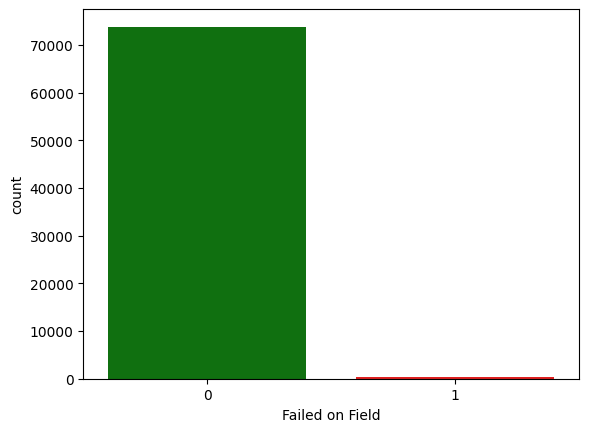

In [ ]:
# Desequilibrio en la variable objetivo 'Failed on Field'.
sns.countplot(x='Failed on Field', data=df_clean, palette=['green', 'red'])

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek

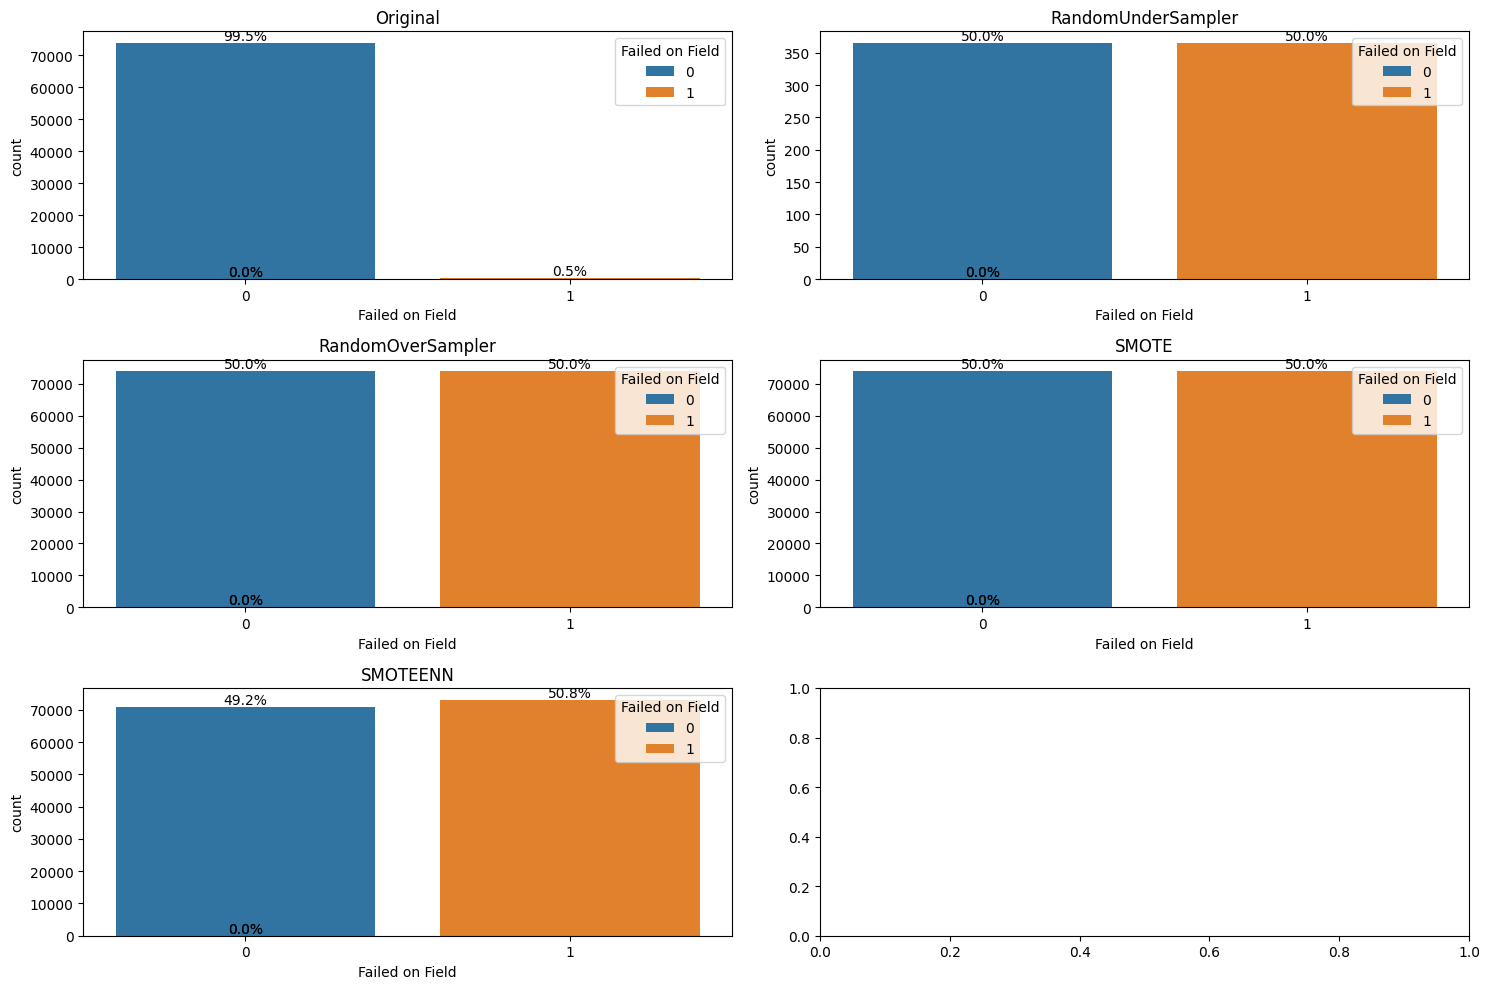

In [ ]:
# Probar modelos de balanceo
models = [
    ('Original', df_clean),
    ('RandomUnderSampler', RandomUnderSampler(sampling_strategy='auto')),
    ('RandomOverSampler', RandomOverSampler(sampling_strategy='auto')),
    ('SMOTE', SMOTE(sampling_strategy='auto')),
    ('SMOTEENN', SMOTEENN(sampling_strategy='auto')),
]

fig, ax = plt.subplots(3, 2, figsize=(15, 10))
ax = ax.ravel()

for i, (name, model) in enumerate(models):
    if name == 'Original':
        data = df_clean
    else:
        data = df_clean.copy()

        # fit the model
        Xr, yr = model.fit_resample(data.drop(columns='Failed on Field'), data['Failed on Field'])
        data = pd.concat([Xr, yr], axis=1)

    sns.countplot(data=data, x='Failed on Field', ax=ax[i], hue='Failed on Field')
    # annotate percentage
    total = len(data)
    for p in ax[i].patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax[i].annotate(percentage, (x, y), ha='center', va='bottom')
    ax[i].set_title(name)

plt.tight_layout()
plt.show()

In [ ]:
# Balancear las clases usando RandomOverSampler
X = df_clean
X = X.drop(['Failed on Field'], axis=1)
y = df_clean['Failed on Field']


# Dividir el dataset en entrenamiento y prueba (opcional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Aplicar RandomOverSampler
ros = RandomOverSampler(sampling_strategy='auto')
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Convertir a DataFrame de pandas
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Failed on Field'] = y_resampled

In [ ]:
df_clean = df_resampled

<Axes: xlabel='Failed on Field', ylabel='count'>

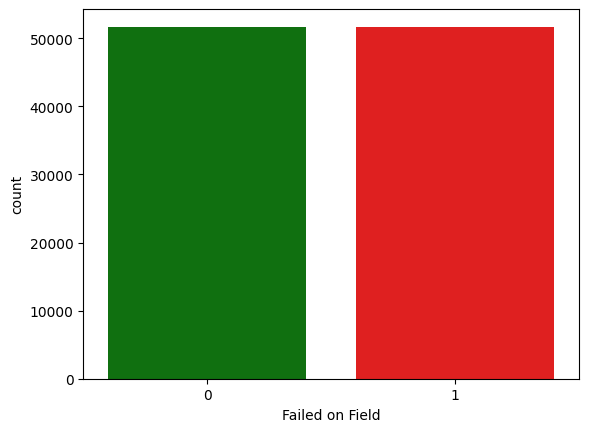

In [ ]:
# Comprobación de desequilibrio en la variable objetivo 'Failed on Field'.
sns.countplot(x='Failed on Field', data=df_clean, palette=['green', 'red'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, classification_report, confusion_matrix

### ¿Qué algoritmo (individual, NO ensambles) se puede utilizar como baseline para predecir las variables objetivo?

Regresión Logística es un modelo lineal ampliamente utilizado para problemas de clasificación binaria, lo que lo convierte en una buena opción como baseline.


In [ ]:
X = df_clean
X = X.drop(['Failed on Field'], axis=1)
y = df_clean[['Failed on Field']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instanciar el modelo de regresión lineal
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# Mostrar el reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

Recall: 0.84

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.80      0.66      0.73     15535
           1       0.71      0.84      0.77     15476

    accuracy                           0.75     31011
   macro avg       0.76      0.75      0.75     31011
weighted avg       0.76      0.75      0.75     31011


Matriz de confusión:
[[10257  5278]
 [ 2491 12985]]


### ¿El modelo está sub/sobreajustando los datos de entrenamiento?

Por los resultados observados, el modelo parece estar en un punto de equilibrio razonable entre subajuste y sobreajuste, aunque la baja precisión en la clase "0" podría ser indicativa de cierto grado de subajuste.

### ¿Cuál es la métrica adecuada para este problema de negocio?
La métrica más relevante para este problema parece ser el recall, especialmente en la clase "1", si la prioridad es identificar eventos críticos (fallos, anomalías). A pesar de una precisión moderada, garantizar un alto recall en esta clase sería importante para reducir el riesgo de fallos no detectados.



## Conclusión


El modelo ha mostrado un rendimiento moderado, con una precisión y recall equilibrados en torno al 73%, lo que sugiere que realiza un trabajo aceptable en ambas clases, pero con margen para mejorar.

El modelo tiene una precisión general del 73%, lo que significa que predice correctamente tres de cada cuatro instancias.
El recall de la clase "1" (la clase positiva, asumiendo que se trata de fallos o eventos importantes) es relativamente alto, con un 83%, lo que indica que el modelo está capturando una buena proporción de los verdaderos positivos. Esto es importante si la clase "1" representa eventos críticos como fallos en el sistema o anomalías.
El recall para la clase "0" es más bajo, 64%, lo que indica que está clasificando incorrectamente una parte significativa de las instancias de la clase "0" como "1" (falsos positivos).

El modelo parece estar en un punto de compromiso entre la precisión y el recall en ambas clases, especialmente en la clase "0". Esto indica que, aunque el modelo es bastante bueno para detectar la clase "1", tiene dificultades con la clase "0", lo que puede resultar en muchos falsos positivos (instancias clasificadas incorrectamente como fallas cuando no lo son).

Clase 0 (normal): Hay una tasa alta de falsos positivos en esta clase. Aunque el modelo identifica correctamente una buena parte de las instancias de la clase "0", su rendimiento aquí es inferior al de la clase "1".
Clase 1 (fallo o evento crítico): El modelo tiene un rendimiento robusto, detectando el 84% de las instancias de esta clase, lo cual es adecuado si la clase "1" es crítica para el negocio.

Ajustar el Umbral de Decisión: Para mejorar el rendimiento en la detección de fallos (clase "1"), se puede ajustar el umbral de decisión del modelo, de forma que aumente el recall para la clase "1" a costa de una mayor tasa de falsos positivos.
Modelos más complejos como Random Forest, Gradient Boosting, o Support Vector Machines (SVM) podrían mejorar el rendimiento al capturar relaciones no lineales más complejas entre las variables.
